In [9]:
%matplotlib inline
import json
import matplotlib.pyplot as plt

def box_plot(json_path):
    with open(json_path) as f:
        d = json.load(f)

    all_aff = []
    all_rig = []
    all_tps = []
    for key in d.keys():

        if 'affine' in key:
            all_aff += d[key]
        if 'rigid' in key:
            all_rig += d[key]
        if 'tps' in key:
            all_tps += d[key]

    import seaborn as sns
    sns.set_theme()
    sns.boxplot({'aff':all_aff, 'rig':all_rig, 'tps':all_tps})
    plt.show()

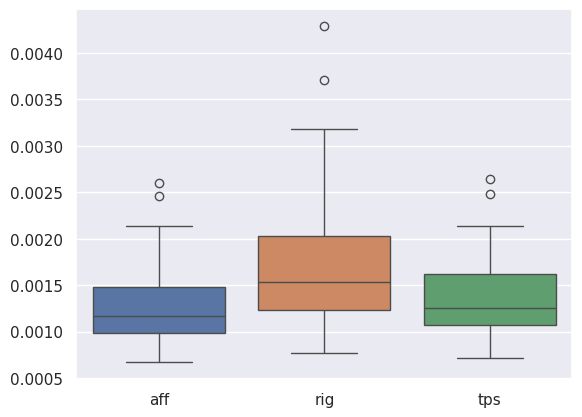

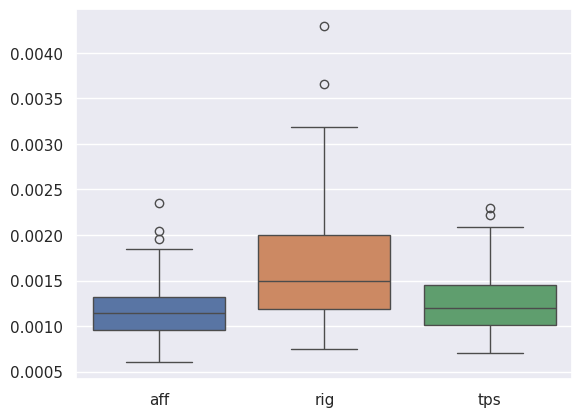

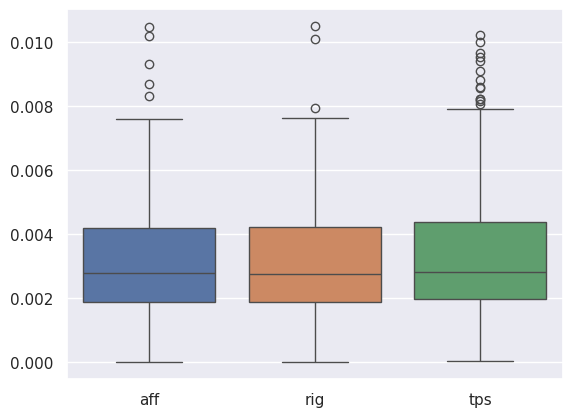

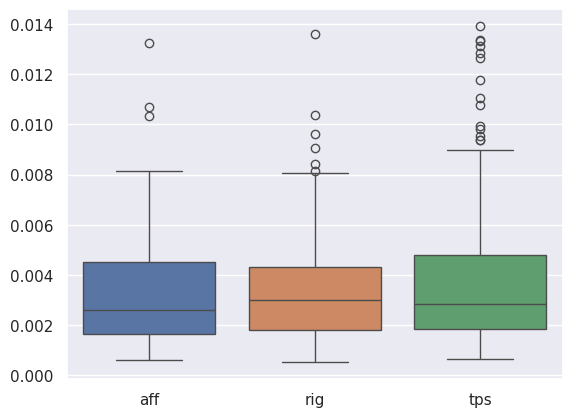

In [12]:
json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-weighted-keymorph_keypoints256_batch1_normTypeinstance_lr3e-06/results/summary.json'
box_plot(json_path)

json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-keymorph_keypoints256_batch1_normTypeinstance_lr3e-06/results/summary.json'
box_plot(json_path)

json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/se3cnn/__eval__gigamed-keymorph-se3cnn_datasetgigamed_keypoints128_batch1_normTypeinstance_lr3e-06/results/summary.json'
box_plot(json_path)

json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/se3cnn/__eval__gigamed-keymorph-se3cnn_datasetgigamed_keypoints256_batch1_normTypeinstance_lr3e-06/results/summary.json'
box_plot(json_path)
